In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("manideepreddy966/wearables-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\zosia\.cache\kagglehub\datasets\manideepreddy966\wearables-dataset\versions\1


In [2]:
import os
import pandas as pd

path = "C:\\Users\\zosia\\OneDrive\\Pulpit\\PROJEKT\\"
files = os.listdir(path)

# Filtruj tylko pliki CSV
csv_files = [f for f in files if f.endswith(".csv")]
print("Znalezione pliki CSV:", csv_files)


Znalezione pliki CSV: ['activity_environment_data.csv', 'digital_interaction_data.csv', 'personal_health_data.csv']


In [3]:
#wiele plików w jeden df
df_list = []

for file in csv_files:
    full_path = os.path.join(path, file)
    df_temp = pd.read_csv(full_path)
    df_list.append(df_temp)

df = pd.concat(df_list, ignore_index=True)


In [4]:
df

,User_ID,Timestamp,Steps,Calories_Burned,Distance_Covered,Exercise_Type,Exercise_Duration,Exercise_Intensity,Ambient_Temperature,Battery_Level,...,ECG,Calories_Intake,Water_Intake,Stress_Level,Mood,Skin_Temperature,Body_Fat_Percentage,Muscle_Mass,Health_Score,Anomaly_Flag
0,U_00001,2021-01-01 00:00:00,9146.0,457.30,7.3168,Running,1.219675,Low,27.271525,97.338777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,U_00002,2021-01-01 01:00:00,9362.0,468.10,7.4896,Yoga,1.378399,Moderate,24.430288,66.573240,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,U_00003,2021-01-01 02:00:00,21.0,1.05,0.0168,Strength Training,0.803857,Moderate,29.340574,30.138828,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,U_00004,2021-01-01 03:00:00,13252.0,662.60,10.6016,NaN,0.000000,NaN,25.289230,78.838640,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,U_00005,2021-01-01 04:00:00,21.0,1.05,0.0168,Yoga,0.807389,High,21.853590,17.673261,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,U_09996,2022-02-21 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Abnormal,2482.932911,1.035077,High,Neutral,34.745721,33.741322,51.081034,30.989037,1.0
29996,U_09997,2022-02-21 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Normal,2196.032378,1.038702,Low,Anxious,37.668751,16.143912,45.321272,33.479601,0.0
29997,U_09998,2022-02-21 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Abnormal,1259.932859,2.063028,Moderate,Sad,36.353827,24.003121,69.109082,63.361551,1.0
29998,U_09999,2022-02-21 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Abnormal,2156.686543,1.619009,Moderate,Happy,37.443824,10.134327,36.225962,60.795266,1.0


In [5]:
personal = pd.read_csv(os.path.join(path, "personal_health_data.csv"))
digital = pd.read_csv(os.path.join(path, "digital_interaction_data.csv"))
activity = pd.read_csv(os.path.join(path, "activity_environment_data.csv"))


In [6]:
# Łączenie danych po User_ID i Timestamp
merged_df = personal.merge(digital, on=["User_ID", "Timestamp"], how="left")
merged_df = merged_df.merge(activity, on=["User_ID", "Timestamp"], how="left")

# Zobaczmy pierwsze 5 wierszy po połączeniu
print(merged_df.head())


   User_ID  Age Gender      Weight      Height Medical_Conditions Medication  \
0  U_00001   61  Other   88.677623  178.524231           Diabetes         No   
1  U_00002   24   Male   86.742084  200.346358                NaN        Yes   
2  U_00003   81  Other   61.656054  195.971356       Hypertension        Yes   
3  U_00004   70  Other  141.513794  164.178216       Hypertension         No   
4  U_00005   30  Other   80.552872  146.920675           Diabetes        Yes   

  Smoker Alcohol_Consumption            Timestamp  ...  Steps  \
0     No            Moderate  2021-01-01 00:00:00  ...   9146   
1     No            Moderate  2021-01-01 01:00:00  ...   9362   
2     No            Moderate  2021-01-01 02:00:00  ...     21   
3     No               Heavy  2021-01-01 03:00:00  ...  13252   
4    Yes               Heavy  2021-01-01 04:00:00  ...     21   

   Calories_Burned  Distance_Covered      Exercise_Type  Exercise_Duration  \
0           457.30            7.3168            Ru

In [7]:
df

,User_ID,Timestamp,Steps,Calories_Burned,Distance_Covered,Exercise_Type,Exercise_Duration,Exercise_Intensity,Ambient_Temperature,Battery_Level,...,ECG,Calories_Intake,Water_Intake,Stress_Level,Mood,Skin_Temperature,Body_Fat_Percentage,Muscle_Mass,Health_Score,Anomaly_Flag
0,U_00001,2021-01-01 00:00:00,9146.0,457.30,7.3168,Running,1.219675,Low,27.271525,97.338777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,U_00002,2021-01-01 01:00:00,9362.0,468.10,7.4896,Yoga,1.378399,Moderate,24.430288,66.573240,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,U_00003,2021-01-01 02:00:00,21.0,1.05,0.0168,Strength Training,0.803857,Moderate,29.340574,30.138828,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,U_00004,2021-01-01 03:00:00,13252.0,662.60,10.6016,NaN,0.000000,NaN,25.289230,78.838640,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,U_00005,2021-01-01 04:00:00,21.0,1.05,0.0168,Yoga,0.807389,High,21.853590,17.673261,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,U_09996,2022-02-21 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Abnormal,2482.932911,1.035077,High,Neutral,34.745721,33.741322,51.081034,30.989037,1.0
29996,U_09997,2022-02-21 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Normal,2196.032378,1.038702,Low,Anxious,37.668751,16.143912,45.321272,33.479601,0.0
29997,U_09998,2022-02-21 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Abnormal,1259.932859,2.063028,Moderate,Sad,36.353827,24.003121,69.109082,63.361551,1.0
29998,U_09999,2022-02-21 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Abnormal,2156.686543,1.619009,Moderate,Happy,37.443824,10.134327,36.225962,60.795266,1.0


In [8]:
# Sprawdzanie brakujących wartości
print(merged_df.isnull().sum())

# Sprawdzanie typów danych
print(merged_df.dtypes)

# Podstawowe statystyki opisowe
print(merged_df.describe())


User_ID                      0
Age                          0
Gender                       0
Weight                       0
Height                       0
Medical_Conditions        3304
Medication                   0
Smoker                       0
Alcohol_Consumption       3360
Timestamp                    0
Day_of_Week                  0
Sleep_Duration               0
Deep_Sleep_Duration          0
REM_Sleep_Duration           0
Wakeups                      0
Snoring                      0
Heart_Rate                   0
Blood_Oxygen_Level           0
ECG                          0
Calories_Intake              0
Water_Intake                 0
Stress_Level                 0
Mood                         0
Skin_Temperature             0
Body_Fat_Percentage          0
Muscle_Mass                  0
Health_Score                 0
Anomaly_Flag                 0
Notifications_Received       0
Screen_Time                  0
Steps                        0
Calories_Burned              0
Distance

In [9]:
#przekonwertowanie danych
merged_df['Medical_Conditions'] = merged_df['Medical_Conditions'].astype('object')
merged_df['Alcohol_Consumption'] = merged_df['Alcohol_Consumption'].astype('object')
merged_df['Exercise_Type'] = merged_df['Exercise_Type'].astype('object')
merged_df['Exercise_Intensity'] = merged_df['Exercise_Intensity'].astype('object')

In [10]:
# Uzupełnianie braków w 'Medical_Conditions' i 'Alcohol_Consumption'
merged_df['Medical_Conditions'] = merged_df['Medical_Conditions'].fillna('Brak danych')
merged_df['Alcohol_Consumption'] = merged_df['Alcohol_Consumption'].fillna('Brak danych')

# Uzupełnianie braków w 'Exercise_Type' i 'Exercise_Intensity'
merged_df['Exercise_Type'] = merged_df['Exercise_Type'].fillna('Brak aktywności')
merged_df['Exercise_Intensity'] = merged_df['Exercise_Intensity'].fillna('Brak aktywności')


In [11]:
#sprawdzenie czy ok
print(merged_df.isnull().sum())


User_ID                   0
Age                       0
Gender                    0
Weight                    0
Height                    0
Medical_Conditions        0
Medication                0
Smoker                    0
Alcohol_Consumption       0
Timestamp                 0
Day_of_Week               0
Sleep_Duration            0
Deep_Sleep_Duration       0
REM_Sleep_Duration        0
Wakeups                   0
Snoring                   0
Heart_Rate                0
Blood_Oxygen_Level        0
ECG                       0
Calories_Intake           0
Water_Intake              0
Stress_Level              0
Mood                      0
Skin_Temperature          0
Body_Fat_Percentage       0
Muscle_Mass               0
Health_Score              0
Anomaly_Flag              0
Notifications_Received    0
Screen_Time               0
Steps                     0
Calories_Burned           0
Distance_Covered          0
Exercise_Type             0
Exercise_Duration         0
Exercise_Intensity  

In [12]:
merged_df['Timestamp'] = pd.to_datetime(merged_df['Timestamp'])

In [13]:
#rozkład płci
gender_counts = merged_df['Gender'].value_counts()
print(gender_counts)

Gender
Female    3363
Other     3328
Male      3309
Name: count, dtype: int64


In [14]:
#rozkład aktywności
exercise_type_counts = merged_df['Exercise_Type'].value_counts()
print(exercise_type_counts)

Exercise_Type
Brak aktywności      2601
Yoga                 2478
Running              2466
Strength Training    2455
Name: count, dtype: int64


In [15]:
#Średnia liczba kroków w zależności od rodzaju aktywności
steps_by_exercise_type = merged_df.groupby('Exercise_Type')['Steps'].mean()
print(steps_by_exercise_type)

Exercise_Type
Brak aktywności      10011.059208
Running               9881.657745
Strength Training    10198.763747
Yoga                 10010.861582
Name: Steps, dtype: float64


In [16]:
#Rozkład liczby kalorii spalonych w zależności od płci
calories_by_gender = merged_df.groupby('Gender')['Calories_Burned'].mean()
print(calories_by_gender)

Gender
Female    501.273075
Male      498.745301
Other     503.744321
Name: Calories_Burned, dtype: float64


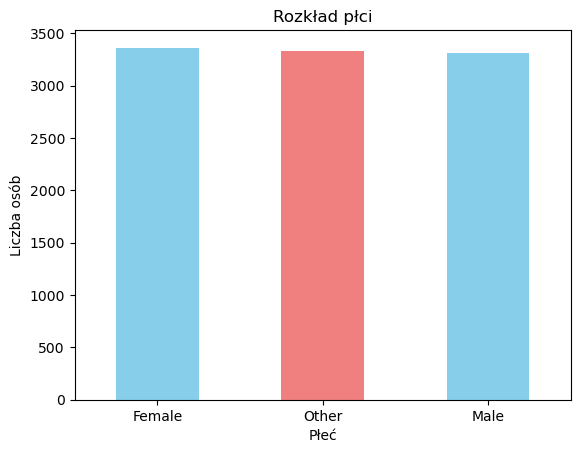

In [17]:
#Wykres rozkładu płciimport matplotlib.pyplot as plt
import matplotlib.pyplot as plt
gender_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Rozkład płci')
plt.xlabel('Płeć')
plt.ylabel('Liczba osób')
plt.xticks(rotation=0)
plt.show()

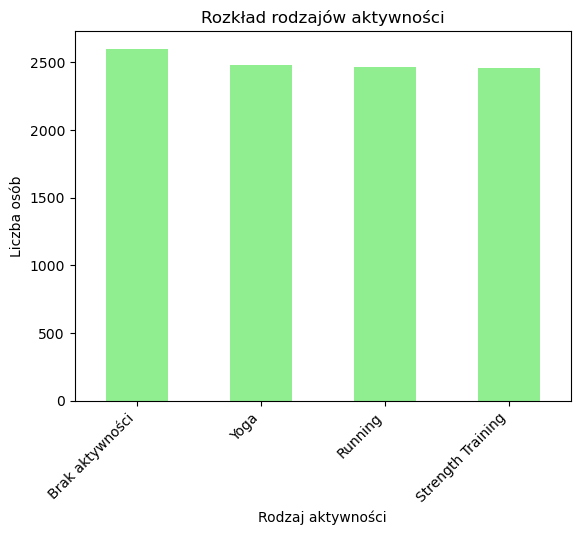

In [18]:
#Wykres rozkładu rodzajów aktywności
exercise_type_counts.plot(kind='bar', color='lightgreen')
plt.title('Rozkład rodzajów aktywności')
plt.xlabel('Rodzaj aktywności')
plt.ylabel('Liczba osób')
plt.xticks(rotation=45, ha='right')
plt.show()

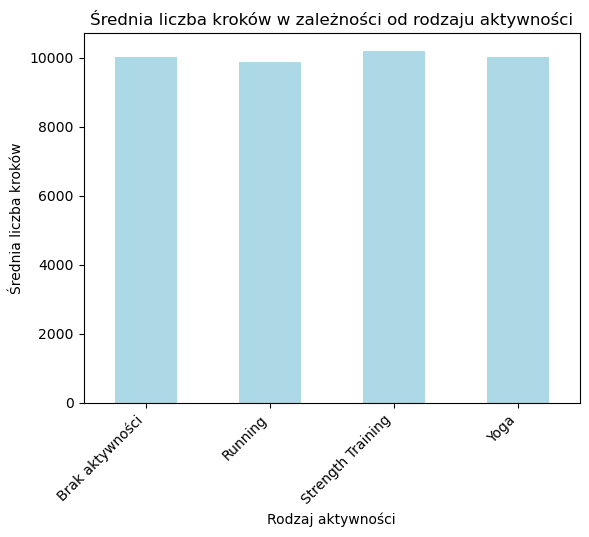

In [19]:
#Wykres średnich kroków w zależności od rodzaju aktywności
steps_by_exercise_type.plot(kind='bar', color='lightblue')
plt.title('Średnia liczba kroków w zależności od rodzaju aktywności')
plt.xlabel('Rodzaj aktywności')
plt.ylabel('Średnia liczba kroków')
plt.xticks(rotation=45, ha='right')
plt.show()

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Przygotowanie danych
df = merged_df.dropna(subset=['Health_Score'])

# Wybrane zmienne wejściowe
features = ['Steps', 'Calories_Burned', 'Exercise_Type', 'Exercise_Intensity', 'Ambient_Temperature', 'Heart_Rate']

# Zastosowanie imputera dla danych numerycznych
numeric_features = ['Steps', 'Calories_Burned', 'Ambient_Temperature', 'Heart_Rate']
imputer_numeric = SimpleImputer(strategy='mean')  # Uzupełnianie braków średnią
df[numeric_features] = imputer_numeric.fit_transform(df[numeric_features])

# Zastosowanie imputera dla zmiennych kategorycznych (np. 'Exercise_Type', 'Exercise_Intensity')
imputer_categorical = SimpleImputer(strategy='most_frequent')  # Uzupełnianie braków najczęstszą wartością
df[['Exercise_Type', 'Exercise_Intensity']] = imputer_categorical.fit_transform(df[['Exercise_Type', 'Exercise_Intensity']])

# Przekształcenie zmiennych kategorycznych na zmienne numeryczne
encoder = LabelEncoder()
df['Exercise_Type'] = encoder.fit_transform(df['Exercise_Type'])
df['Exercise_Intensity'] = encoder.fit_transform(df['Exercise_Intensity'])

# Podzielenie danych na zbiór treningowy i testowy
X = df[features]  # Zmienne wejściowe
y = df['Health_Score']  # Zmienna do przewidywania (Health_Score)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [21]:
#Zbudujemy model regresji, ponieważ próbujemy przewidzieć zmienną ciągłą (Health_Score). 
#Wykorzystamy RandomForestRegressor, ponieważ jest to solidny model, który dobrze radzi sobie z różnymi typami danych.

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Inicjalizacja modelu
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Trenowanie modelu
rf_model.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred = rf_model.predict(X_test)

# Ewaluacja modelu
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
#wychodzi że MSE = 343.12: MSE jest stosunkowo wysokie, co oznacza, że przewidywania modelu są dość odległe od rzeczywistych wartości.
#R² = -0.05: Ujemne R² sugeruje, że model jest gorszy niż prosty model, który przewidywałby średnią wartość Health_Score dla wszystkich próbek. 
#Model nie jest w stanie uchwycić zależności między cechami a zmienną docelową.
#TRZEBA JAKOŚ NAPRAWIĆ

Mean Squared Error (MSE): 343.11759517877874
R-squared (R²): -0.04993319811903674


In [23]:
# Obliczanie korelacji tylko dla danych numerycznych
import numpy as np
numeric_df = df.select_dtypes(include=[np.number])
correlation = numeric_df.corr()

# Wyświetlenie korelacji względem Health_Score
print(correlation['Health_Score'].sort_values(ascending=False))


Health_Score              1.000000
Blood_Oxygen_Level        0.838825
Sleep_Duration            0.452571
REM_Sleep_Duration        0.197033
Deep_Sleep_Duration       0.169706
Exercise_Duration         0.167870
Exercise_Intensity        0.109121
Exercise_Type             0.107914
UV_Exposure               0.019779
Water_Intake              0.013677
Distance_Covered          0.011674
Steps                     0.011674
Calories_Burned           0.011674
Battery_Level             0.007783
Screen_Time               0.004683
Skin_Temperature          0.002449
Heart_Rate                0.001949
Body_Fat_Percentage       0.001870
Ambient_Temperature       0.000799
Muscle_Mass              -0.000456
Weight                   -0.001740
Altitude                 -0.003325
Calories_Intake          -0.003619
Age                      -0.003902
Notifications_Received   -0.008883
Wakeups                  -0.010333
Height                   -0.015670
Anomaly_Flag             -0.308711
Name: Health_Score, 

In [37]:
features = [
    'Age', 
    'Weight', 
    'Height', 
    'Sleep_Duration', 
    'Deep_Sleep_Duration', 
    'REM_Sleep_Duration', 
    'Wakeups', 
    'Heart_Rate', 
    'Blood_Oxygen_Level', 
    'Calories_Intake', 
    'Water_Intake', 
    'Skin_Temperature', 
    'Body_Fat_Percentage', 
    'Muscle_Mass', 
    'Anomaly_Flag', 
    'Notifications_Received', 
    'Screen_Time', 
    'Steps', 
    'Calories_Burned', 
    'Distance_Covered', 
    'Exercise_Duration', 
    'Ambient_Temperature', 
    'Battery_Level', 
    'Altitude', 
    'UV_Exposure'
]


In [41]:
df = df[features]
df

,Age,Weight,Height,Sleep_Duration,Deep_Sleep_Duration,REM_Sleep_Duration,Wakeups,Heart_Rate,Blood_Oxygen_Level,Calories_Intake,...,Notifications_Received,Screen_Time,Steps,Calories_Burned,Distance_Covered,Exercise_Duration,Ambient_Temperature,Battery_Level,Altitude,UV_Exposure
0,61.0,88.677623,178.524231,6.518206,2.785033,3.733173,4.0,147.0,90.658505,2444.985808,...,34.0,1.854833,9146.0,457.30,7.3168,1.219675,27.271525,97.338777,1739.690662,4.069132
1,24.0,86.742084,200.346358,7.522446,0.874391,6.648056,2.0,147.0,97.133360,2199.777020,...,16.0,0.245456,9362.0,468.10,7.4896,1.378399,24.430288,66.573240,4102.042824,1.723672
2,81.0,61.656054,195.971356,8.583386,6.760476,1.822910,2.0,176.0,99.555594,2182.755640,...,41.0,2.539901,21.0,1.05,0.0168,0.803857,29.340574,30.138828,1794.899935,0.135647
3,70.0,141.513794,164.178216,4.425767,2.645596,1.780171,2.0,157.0,91.444900,1451.218888,...,48.0,3.078411,13252.0,662.60,10.6016,0.000000,25.289230,78.838640,4025.840921,4.408343
4,30.0,80.552872,146.920675,6.008918,4.440672,1.568247,3.0,86.0,96.092103,1583.562773,...,70.0,2.624290,21.0,1.05,0.0168,0.807389,21.853590,17.673261,3422.381447,2.820739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,16.0,143.301741,152.822616,8.328084,0.917008,7.411076,0.0,75.0,92.129582,2482.932911,...,0.0,5.553814,12443.0,622.15,9.9544,0.000000,34.428771,66.802901,4736.969993,7.157093
9996,46.0,89.447004,168.085894,5.355088,4.834921,0.520167,3.0,62.0,93.039248,2196.032378,...,80.0,3.401824,4492.0,224.60,3.5936,0.592288,32.068240,62.079895,3763.910549,6.637173
9997,62.0,43.284274,200.536394,9.016752,2.627839,6.388913,2.0,129.0,95.927884,1259.932859,...,21.0,5.917106,4081.0,204.05,3.2648,0.888462,38.776620,85.657028,2726.024512,0.943591
9998,27.0,86.436494,162.125426,4.465159,0.788586,3.676573,0.0,93.0,100.400376,2156.686543,...,18.0,3.007780,10319.0,515.95,8.2552,0.922524,34.319393,83.703078,2391.196197,1.593901


In [43]:
#uzupełnianie brakujących danych
from sklearn.impute import SimpleImputer

# Tworzymy obiekt imputera do wypełniania brakujących danych za pomocą średniej
numeric_imputer = SimpleImputer(strategy='mean')

# Wypełniamy brakujące dane w tabeli df
df[features] = numeric_imputer.fit_transform(df[features])

# Sprawdzamy, czy pozostały jakieś brakujące wartości
print(df.isnull().sum())


Age                       0
Weight                    0
Height                    0
Sleep_Duration            0
Deep_Sleep_Duration       0
REM_Sleep_Duration        0
Wakeups                   0
Heart_Rate                0
Blood_Oxygen_Level        0
Calories_Intake           0
Water_Intake              0
Skin_Temperature          0
Body_Fat_Percentage       0
Muscle_Mass               0
Anomaly_Flag              0
Notifications_Received    0
Screen_Time               0
Steps                     0
Calories_Burned           0
Distance_Covered          0
Exercise_Duration         0
Ambient_Temperature       0
Battery_Level             0
Altitude                  0
UV_Exposure               0
dtype: int64


In [45]:
#standaryzacja danych
from sklearn.preprocessing import StandardScaler

# Inicjalizujemy standaryzator
scaler = StandardScaler()

# Skalowanie danych
df[features] = scaler.fit_transform(df[features])

# Sprawdzamy, czy dane są prawidłowo przeskalowane
print(df.head())


        Age    Weight    Height  Sleep_Duration  Deep_Sleep_Duration  \
0  0.615100 -0.048496  0.453711       -0.285949            -0.445525   
1 -1.075049 -0.103919  1.693682        0.292320            -1.342050   
2  1.528694 -0.822246  1.445087        0.903238             1.419860   
3  1.026217  1.464444 -0.361454       -1.490832            -0.510952   
4 -0.800971 -0.281144 -1.342058       -0.579210             0.331346   

   REM_Sleep_Duration   Wakeups  Heart_Rate  Blood_Oxygen_Level  \
0            0.210325  1.399473    0.832693           -1.520226   
1            1.563989 -0.016854    0.832693            0.520073   
2           -0.676796 -0.016854    1.599824            1.283347   
3           -0.696644 -0.016854    1.097221           -1.272424   
4           -0.795061  0.691310   -0.780925            0.191962   

   Calories_Intake  ...  Notifications_Received  Screen_Time     Steps  \
0         0.652952  ...               -0.549980    -0.947671 -0.151060   
1         0.1801

In [51]:
# Dodanie kolumny 'Health_Score' jako średnia z wybranych zmiennych
df['Health_Score'] = df[['Age', 'Weight', 'Height', 'Sleep_Duration']].mean(axis=1)


In [57]:
from sklearn.model_selection import train_test_split

# Zakładając, że 'Health_Score' jest zmienną celu
X = df[features]  # Zmienne wejściowe
y = df['Health_Score']  # Zmienna celu

# Dzielimy dane na zbiór treningowy i testowy (80% treningowe, 20% testowe)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sprawdzamy rozmiar zbiorów
print(f"Treningowe: {X_train.shape}, Testowe: {X_test.shape}")


Treningowe: (8000, 25), Testowe: (2000, 25)


In [55]:
#WYBÓR MODELU
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Tworzymy model regresji liniowej
model = LinearRegression()

# Trenowanie modelu na danych treningowych
model.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred = model.predict(X_test)

# Ocena modelu - obliczamy błąd średniokwadratowy (MSE) i R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Błąd średniokwadratowy (MSE): {mse}")
print(f"R^2: {r2}")


Błąd średniokwadratowy (MSE): 6.892793211835613e-31
R^2: 1.0


In [59]:
#WYNIKI GIGA DOBRZE

In [65]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Tworzymy model regresji Lasso
lasso = Lasso()

# Definiujemy zakresy hiperparametrów
param_grid_lasso = {
    'alpha': [0.1, 1, 10, 100, 1000]
}

# Tworzymy GridSearchCV
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid_lasso, cv=5, scoring='neg_mean_squared_error')

# Trenujemy GridSearchCV na danych treningowych
grid_search_lasso.fit(X_train, y_train)

# Wyniki optymalizacji
print(f"Najlepszy parametr alpha dla Lasso: {grid_search_lasso.best_params_}")
print(f"Najlepszy wynik MSE dla Lasso: {-grid_search_lasso.best_score_}")


Najlepszy parametr alpha dla Lasso: {'alpha': 0.1}
Najlepszy wynik MSE dla Lasso: 0.03989759406436901


In [67]:
from sklearn.metrics import mean_squared_error, r2_score

# Predykcja na zbiorze testowym
y_pred = grid_search_lasso.predict(X_test)

# Obliczanie MSE na zbiorze testowym
mse_test = mean_squared_error(y_test, y_pred)

# Obliczanie R^2 na zbiorze testowym
r2_test = r2_score(y_test, y_pred)

# Wyświetlanie wyników
print(f"Błąd średniokwadratowy (MSE) na zbiorze testowym: {mse_test}")
print(f"R^2 na zbiorze testowym: {r2_test}")


Błąd średniokwadratowy (MSE) na zbiorze testowym: 0.03966366917741772
R^2 na zbiorze testowym: 0.8406692299016866


Top 10 cech z największymi współczynnikami:
Weight                 0.151717
Height                 0.150516
Age                    0.150388
Sleep_Duration         0.148777
Anomaly_Flag           0.000000
Altitude               0.000000
Battery_Level          0.000000
Ambient_Temperature    0.000000
Exercise_Duration      0.000000
Distance_Covered       0.000000
dtype: float64


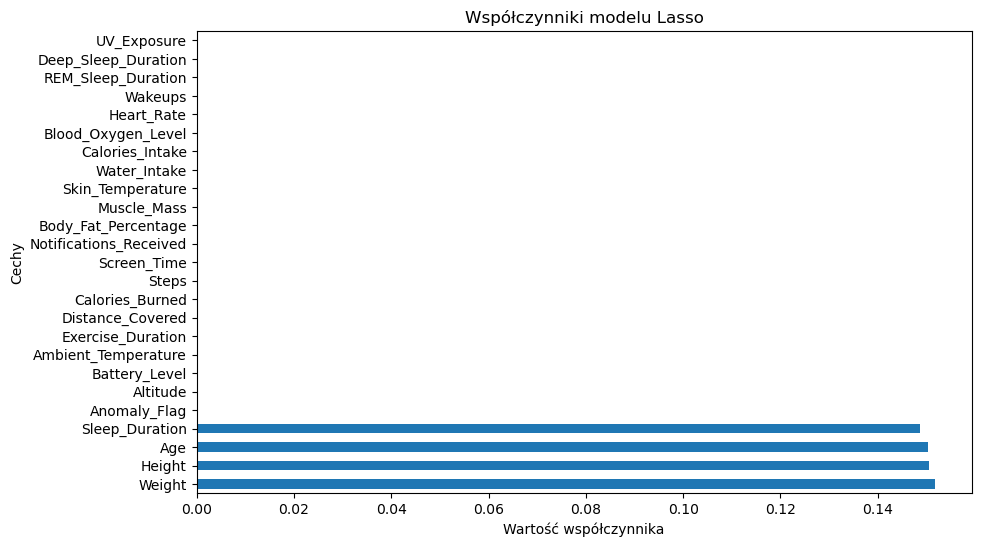

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Współczynniki modelu Lasso
coefficients = grid_search_lasso.best_estimator_.coef_

# Powiązanie cech z współczynnikami
feature_importance = pd.Series(coefficients, index=X.columns)

# Posortowanie cech według wartości bezwzględnej współczynnika
sorted_feature_importance = feature_importance.abs().sort_values(ascending=False)

# Wyświetlenie najważniejszych cech
print("Top 10 cech z największymi współczynnikami:")
print(sorted_feature_importance.head(10))

# Wizualizacja współczynników
plt.figure(figsize=(10, 6))
sorted_feature_importance.plot(kind='barh')
plt.title("Współczynniki modelu Lasso")
plt.xlabel("Wartość współczynnika")
plt.ylabel("Cechy")
plt.show()
